In [4]:
# 使下面的代码支持python2和python3
from __future__ import division, print_function, unicode_literals

# 查看python的版本是否为3.5及以上
import sys
assert sys.version_info >= (3, 5)

# 查看sklearn的版本是否为0.20及以上
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os 

# 在每一次的运行后获得的结果与这个notebook的结果相同
np.random.seed(42) 

# 让matplotlib的图效果更好
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 设置保存图片的途径
PROJECT_ROOT_DIR = "."
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    '''
    只需在fe_ml_3rd.ipynb文件所在目录处，建立一个images的文件夹，运行即可保存自动图片
    
    fig_id : 图片名称
    '''
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# 忽略掉没用的警告 (Scipy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [5]:
df = pd.read_excel("总数据7.13修改版.xlsx")

In [6]:
df

,Sample type,天然：1,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
0,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.090,NaN,NaN,NaN,29.610,NaN,NaN,2.160000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.180,NaN,NaN,NaN,29.170,NaN,NaN,2.295000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.410,NaN,NaN,NaN,24.420,NaN,NaN,2.253000e+01,NaN,NaN,NaN,NaN,5.16,NaN,NaN,NaN,0.000
3,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,47.370,NaN,NaN,NaN,22.810,NaN,NaN,2.212000e+01,NaN,NaN,NaN,NaN,7.61,NaN,NaN,NaN,0.000
4,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,47.470,NaN,NaN,NaN,18.960,NaN,NaN,2.249000e+01,NaN,NaN,NaN,NaN,10.81,NaN,NaN,NaN,0.106
5,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,47.510,NaN,NaN,NaN,16.020,NaN,NaN,2.176000e+01,NaN,NaN,NaN,NaN,15.04,NaN,NaN,NaN,0.038
6,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,47.030,NaN,NaN,NaN,11.700,NaN,NaN,2.224000e+01,NaN,NaN,NaN,NaN,19.62,NaN,NaN,NaN,0.036
7,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,46.370,NaN,NaN,NaN,7.690,NaN,NaN,2.165000e+01,NaN,NaN,NaN,NaN,23.76,NaN,NaN,NaN,0.022
8,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,45.980,NaN,NaN,NaN,5.760,NaN,NaN,2.194000e+01,NaN,NaN,NaN,NaN,26.90,NaN,NaN,NaN,0.033
9,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,51.040,1.000000e-02,3.600000e-01,NaN,17.750,7.900000e-01,6.880000e+00,2.287000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [7]:
df.columns

Index(['Sample type', '天然：1', 'SiO2', 'TiO2', 'Al2O3', 'Cr2O3', 'FeOtot',
       'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'NiO', 'ZnO', 'Li2O',
       'ZrO2', 'V2O5', 'Fe3+/Fetot'],
      dtype='object')

In [8]:
# 建立副本，以免修改原数据
df_edit = df.iloc[:, 2:]

In [9]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 17 columns):
SiO2          390 non-null float64
TiO2          354 non-null float64
Al2O3         364 non-null float64
Cr2O3         348 non-null float64
FeOtot        390 non-null float64
MnO           330 non-null float64
MgO           379 non-null float64
CaO           390 non-null float64
Na2O          380 non-null float64
K2O           169 non-null float64
P2O5          5 non-null float64
NiO           171 non-null float64
ZnO           15 non-null float64
Li2O          5 non-null float64
ZrO2          3 non-null float64
V2O5          8 non-null float64
Fe3+/Fetot    390 non-null float64
dtypes: float64(17)
memory usage: 51.9 KB


In [10]:
df_edit.describe()

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
count,390.000000,354.000000,3.640000e+02,348.000000,390.000000,330.000000,3.790000e+02,3.900000e+02,380.000000,1.690000e+02,5.000000,171.000000,1.500000e+01,5.000000,3.000000,8.000000e+00,390.000000
mean,52.588121,0.683474,5.634114e+00,0.804728,5.821023,0.112056,1.436257e+01,1.817262e+01,2.171707,3.023375e-02,0.205200,0.050912,7.260000e+00,7.684000,0.640000,4.200004e-02,0.277177
std,3.169816,1.334923,4.238189e+00,1.418578,7.056935,0.130789,4.487865e+00,5.577510e+00,2.221430,7.362901e-02,0.321835,0.070330,9.673504e+00,0.122558,0.372424,3.600392e-02,0.214405
min,41.620000,0.000000,1.000000e-07,0.000000,0.040000,0.000000,1.000000e-07,1.000000e-07,0.000000,0.000000e+00,0.040000,0.000000,1.000000e-07,7.500000,0.420000,1.000000e-07,0.000000
25%,51.220000,0.090000,2.460000e+00,0.070000,2.542500,0.040000,1.246000e+01,1.780750e+01,1.000000,1.000000e-07,0.055000,0.020000,1.000000e-07,7.621000,0.425000,1.000000e-07,0.154775
50%,52.415000,0.340000,5.795000e+00,0.710000,3.295000,0.090000,1.510000e+01,1.980000e+01,1.570000,5.000000e-03,0.061000,0.040000,1.000000e-07,7.739000,0.430000,5.650000e-02,0.230000
75%,54.777500,0.630000,7.102500e+00,1.160000,6.662500,0.120000,1.637000e+01,2.107250e+01,2.112500,3.000000e-02,0.090000,0.060000,1.292500e+01,7.760000,0.750000,6.925000e-02,0.320000
max,64.960000,9.760000,2.821600e+01,23.670000,54.350000,0.930000,3.975000e+01,2.550000e+01,12.980000,6.300000e-01,0.780000,0.470000,2.690000e+01,7.800000,1.070000,8.400000e-02,1.000000


Saving figure data_describe


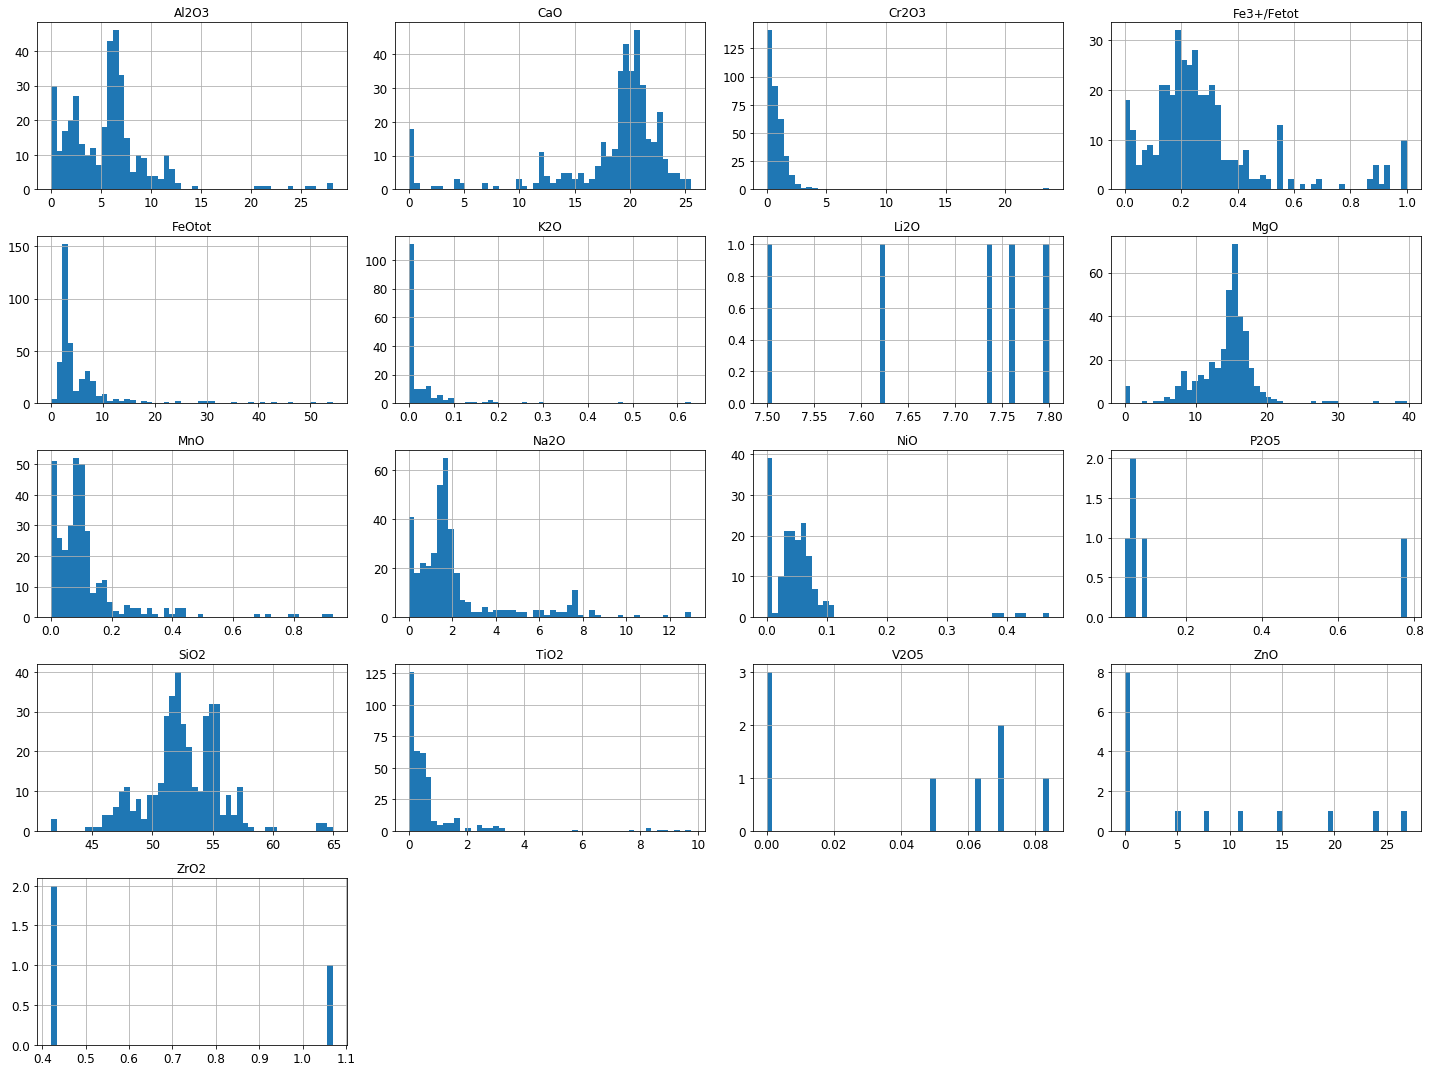

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# 用柱状图的方式表示出来，横坐标为含量，纵坐标为数量
df_edit.hist(bins=50, figsize=(20, 15))
save_fig('data_describe')
plt.show()

In [12]:
# 查找每对属性间的皮尔逊相关系数，即相关系数矩阵
corr_matrix = df_edit.corr()

In [13]:
corr_matrix

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
SiO2,1.000000,-0.147970,0.086674,0.084975,-0.373479,-0.278171,0.053447,-0.298423,0.346860,0.041493,-0.547651,0.101765,-0.901960,0.387234,0.983195,0.291250,0.277212
TiO2,-0.147970,1.000000,-0.056922,-0.152735,-0.040777,-0.007273,-0.139259,0.128355,-0.009840,-0.057670,-0.188904,-0.152378,NaN,0.252945,-0.238957,0.151551,0.105109
Al2O3,0.086674,-0.056922,1.000000,-0.067491,-0.219126,-0.088014,-0.416861,-0.281077,0.262907,-0.039198,-0.416450,-0.007463,NaN,-0.017285,-0.557137,-0.733644,0.398238
Cr2O3,0.084975,-0.152735,-0.067491,1.000000,-0.185514,-0.060642,0.008497,-0.069348,0.173983,-0.045668,NaN,0.029392,NaN,NaN,NaN,0.847341,0.136139
FeOtot,-0.373479,-0.040777,-0.219126,-0.185514,1.000000,0.344348,-0.358755,-0.475406,0.023268,0.080445,0.506131,-0.133151,0.348216,0.004801,0.784918,-0.438791,-0.060955
MnO,-0.278171,-0.007273,-0.088014,-0.060642,0.344348,1.000000,-0.183629,-0.043607,-0.045479,-0.025438,0.618937,-0.152764,NaN,-0.245729,0.594172,0.286214,0.088149
MgO,0.053447,-0.139259,-0.416861,0.008497,-0.358755,-0.183629,1.000000,0.189288,-0.586601,-0.051134,0.375507,0.145662,NaN,0.602549,0.094267,0.411657,-0.423090
CaO,-0.298423,0.128355,-0.281077,-0.069348,-0.475406,-0.043607,0.189288,1.000000,-0.354904,-0.023971,0.576144,-0.015756,0.526712,0.224392,0.147530,0.074784,-0.195911
Na2O,0.346860,-0.009840,0.262907,0.173983,0.023268,-0.045479,-0.586601,-0.354904,1.000000,0.052979,-0.149329,-0.019380,NaN,0.042606,0.054443,-0.672321,0.443645
K2O,0.041493,-0.057670,-0.039198,-0.045668,0.080445,-0.025438,-0.051134,-0.023971,0.052979,1.000000,0.959983,0.254495,NaN,0.240925,NaN,NaN,-0.133499


In [14]:
# 查看每个属性和目标值的相关系数（只测量线性关系），接近1表示强正相关，接近-1表示强负相关，接近0表示没有线性关系
corr_matrix["Fe3+/Fetot"].sort_values(ascending=False)

Fe3+/Fetot    1.000000
ZrO2          0.511582
Na2O          0.443645
Al2O3         0.398238
SiO2          0.277212
Li2O          0.220511
Cr2O3         0.136139
NiO           0.132259
TiO2          0.105109
MnO           0.088149
FeOtot       -0.060955
K2O          -0.133499
CaO          -0.195911
V2O5         -0.393636
MgO          -0.423090
P2O5         -0.564129
ZnO          -0.634439
Name: Fe3+/Fetot, dtype: float64

Saving figure corr_four


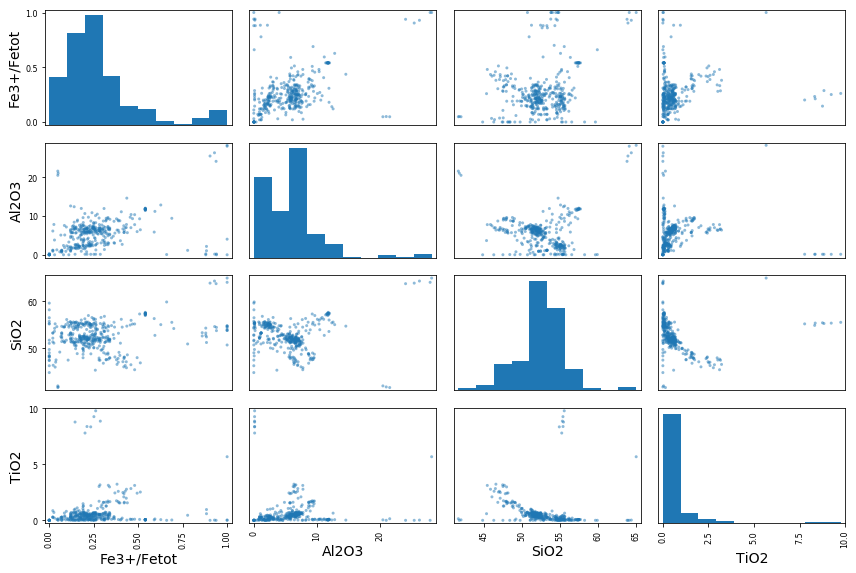

In [15]:
from pandas.plotting import scatter_matrix

# 查看前四个相关系数最大的属性的分布
attributes = ['Fe3+/Fetot', 'Al2O3', 'SiO2', 'TiO2']
scatter_matrix(df_edit[attributes], figsize=(12, 8))
save_fig('corr_four')

In [16]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
train_set, test_set = train_test_split(df_edit, test_size=0.2, random_state=42)
# drop()会创建一份数据备份，不会影响train_set，major_el为特征值，major_el_labels为标签值
major_el = train_set.drop("Fe3+/Fetot", axis=1)
major_el_labels = train_set["Fe3+/Fetot"].copy()
major_el_test = test_set.drop("Fe3+/Fetot", axis=1)
major_el_test_labels = test_set["Fe3+/Fetot"].copy()

In [17]:
major_el.shape

(312, 16)

In [18]:
major_el_test.shape

(78, 16)

In [19]:
# 查看哪一列含空值
major_el.isnull().any(axis=0)

SiO2      False
TiO2       True
Al2O3      True
Cr2O3      True
FeOtot    False
MnO        True
MgO        True
CaO       False
Na2O       True
K2O        True
P2O5       True
NiO        True
ZnO        True
Li2O       True
ZrO2       True
V2O5       True
dtype: bool

In [20]:
# 将训练集中特征的空值插值为0
major_el.fillna(0, inplace=True)
major_el

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5
291,51.710000,8.000000e-01,7.160000e+00,6.200000e-01,2.97,6.800000e-01,14.720,19.910000,2.200000e+00,0.000000e+00,0.000,6.000000e-02,0.000000e+00,0.000,0.00,0.00
63,51.220000,4.700000e-01,6.350000e+00,7.000000e-01,3.09,8.000000e-02,15.000,20.290000,1.430000e+00,0.000000e+00,0.000,2.000000e-02,0.000000e+00,0.000,0.00,0.00
239,51.970000,3.000000e-01,3.120000e+00,1.700000e-01,7.26,1.500000e-01,16.840,20.740000,2.000000e-01,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000,0.00,0.00
353,54.100000,2.200000e-01,2.940000e+00,1.240000e+00,2.49,0.000000e+00,17.000,19.700000,1.990000e+00,1.000000e-07,0.000,0.000000e+00,0.000000e+00,0.000,0.00,0.00
219,51.590000,2.400000e-01,6.920000e+00,8.200000e-01,2.58,1.200000e-01,15.270,20.990000,1.250000e+00,0.000000e+00,0.000,4.000000e-02,0.000000e+00,0.000,0.00,0.00
84,53.720000,1.100000e-01,3.080000e+00,1.280000e+00,2.68,7.000000e-02,16.390,20.960000,1.570000e+00,0.000000e+00,0.000,1.000000e-02,0.000000e+00,0.000,0.00,0.00
225,55.570000,6.400000e-01,1.258000e+01,0.000000e+00,5.13,0.000000e+00,7.560,11.550000,6.930000e+00,2.900000e-01,0.000,0.000000e+00,0.000000e+00,0.000,0.00,0.00
238,53.220000,2.600000e-01,1.130000e+00,3.300000e-01,6.42,1.700000e-01,17.560,20.840000,1.900000e-01,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000,0.00,0.00
139,54.300000,1.000000e-07,1.820000e+00,1.430000e+00,2.11,6.000000e-02,17.200,20.470000,1.420000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000,0.00,0.00
312,55.350000,9.240000e+00,1.200000e-01,1.500000e-01,2.48,2.000000e-02,10.980,17.450000,4.410000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000,0.00,0.00


In [21]:
test = train_set.drop("Fe3+/Fetot", axis=1)
a1= test.shape[0]
print(a1)

312


In [22]:
test2 = test_set.drop("Fe3+/Fetot", axis=1)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

impute = SimpleImputer(strategy="mean")
test_processed = impute.fit_transform(major_el)
print(test_processed.shape)
test2_processed = impute.transform(major_el_test)
print(test2_processed.shape)

scaled = StandardScaler()
test_scaled = pd.DataFrame(scaled.fit_transform(test_processed))
test_scaled

(312, 16)
(78, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.232840,0.137486,0.499381,-0.073501,-0.396339,4.487497,0.132604,0.301185,0.027226,-0.261464,-0.069487,0.749278,-0.115325,-0.056705,-0.088919,-0.113297
1,-0.396640,-0.123541,0.289274,-0.019111,-0.379394,-0.130381,0.192145,0.371786,-0.315186,-0.261464,-0.069487,-0.029712,-0.115325,-0.056705,-0.088919,-0.113297
2,-0.145926,-0.258009,-0.548560,-0.379446,0.209453,0.408371,0.583409,0.455393,-0.862157,-0.261464,-0.069487,-0.419207,-0.115325,-0.056705,-0.088919,-0.113297
3,0.566100,-0.321288,-0.595250,0.348022,-0.464120,-0.746098,0.617432,0.262169,-0.066159,-0.261462,-0.069487,-0.419207,-0.115325,-0.056705,-0.088919,-0.113297
4,-0.272954,-0.305468,0.437127,0.062474,-0.451411,0.177477,0.249559,0.501841,-0.395231,-0.261464,-0.069487,0.359783,-0.115325,-0.056705,-0.088919,-0.113297
5,0.439072,-0.408297,-0.558935,0.375217,-0.437290,-0.207346,0.487720,0.496268,-0.252929,-0.261464,-0.069487,-0.224459,-0.115325,-0.056705,-0.088919,-0.113297
6,1.057498,0.010928,1.905283,-0.495025,-0.091325,-0.746098,-1.389925,-1.252044,2.130618,5.022124,-0.069487,-0.419207,-0.115325,-0.056705,-0.088919,-0.113297
7,0.271929,-0.289648,-1.064749,-0.270666,0.090836,0.562301,0.736513,0.473972,-0.866604,-0.261464,-0.069487,-0.419207,-0.115325,-0.056705,-0.088919,-0.113297
8,0.632956,-0.495306,-0.885769,0.477199,-0.517780,-0.284310,0.659961,0.405229,-0.319633,-0.261464,-0.069487,-0.419207,-0.115325,-0.056705,-0.088919,-0.113297
9,0.983955,6.813441,-1.326734,-0.393044,-0.465532,-0.592169,-0.662683,-0.155865,1.009995,-0.261464,-0.069487,-0.419207,-0.115325,-0.056705,-0.088919,-0.113297


In [24]:
test1 = train_set.drop("Fe3+/Fetot", axis=1)

In [25]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 可进行中位数、众数等填充
# 可以将特征值标准化，即转化成正态分布
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), 
        ('std_scaler', StandardScaler())
    ])

major_el_processed = num_pipeline.fit_transform(test1)
major_el_processed

array([[-0.23284017,  0.1162558 ,  0.43766873, ..., -1.        ,
        -0.05580917, -0.02848581],
       [-0.39663954, -0.14692805,  0.21462613, ..., -1.        ,
        -0.05580917, -0.02848581],
       [-0.14592622, -0.28250761, -0.67479064, ..., -1.        ,
        -0.05580917, -0.02848581],
       ...,
       [-0.41001092, -0.01134849,  0.28897366, ..., -1.        ,
        -0.05580917,  0.52698747],
       [ 0.90038403, -0.4340377 , -0.8675435 , ..., -1.        ,
        -0.05580917, -0.02848581],
       [-0.78440948, -0.24263127,  0.72679802, ..., -1.        ,
        -0.05580917, -0.02848581]])

In [26]:
# 将测试集中的特征的空值设置为0
major_el_test.fillna(0, inplace=True)
# major_el_test_processed = num_pipeline.fit_transform(major_el_test)
major_el_test

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5
9,51.040,1.000000e-02,3.600000e-01,0.000000e+00,17.750,7.900000e-01,6.880000e+00,2.287000e+01,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000,0.0,0.000000e+00
42,50.690,0.000000e+00,1.000000e-07,1.000000e-07,11.250,0.000000e+00,1.217000e+01,2.012000e+01,2.700000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000,0.0,0.000000e+00
33,53.790,0.000000e+00,0.000000e+00,0.000000e+00,15.060,0.000000e+00,9.740000e+00,1.330000e+01,6.380000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000,0.0,0.000000e+00
311,55.520,9.760000e+00,1.300000e-01,2.000000e-02,2.720,7.000000e-02,1.056000e+01,1.653000e+01,4.770000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000,0.0,0.000000e+00
272,50.640,7.100000e-01,7.160000e+00,8.300000e-01,2.770,7.000000e-02,1.465000e+01,2.071000e+01,2.350000e+00,1.000000e-07,0.000,4.000000e-02,1.000000e-07,0.000,0.0,1.000000e-07
377,64.320,2.000000e-02,2.628000e+01,0.000000e+00,2.250,2.700000e-01,2.000000e-02,1.000000e-07,1.400000e-01,1.000000e-07,0.000,0.000000e+00,0.000000e+00,7.800,0.0,0.000000e+00
55,51.530,3.300000e-01,7.140000e+00,6.800000e-01,3.440,1.100000e-01,1.534000e+01,1.877000e+01,1.840000e+00,0.000000e+00,0.000,5.000000e-02,0.000000e+00,0.000,0.0,0.000000e+00
268,52.430,6.000000e-01,7.600000e+00,5.100000e-01,3.140,1.000000e-07,1.485000e+01,1.931000e+01,1.810000e+00,1.000000e-07,0.000,1.000000e-07,1.000000e-07,0.000,0.0,1.000000e-07
245,51.400,3.600000e-01,6.600000e+00,8.400000e-01,4.700,0.000000e+00,1.500000e+01,1.970000e+01,1.400000e+00,0.000000e+00,0.000,4.700000e-01,0.000000e+00,0.000,0.0,0.000000e+00
113,55.280,1.200000e-01,3.410000e+00,3.140000e+00,2.210,4.000000e-02,1.494000e+01,1.744000e+01,3.240000e+00,0.000000e+00,0.000,5.000000e-02,0.000000e+00,0.000,0.0,0.000000e+00


In [27]:
from sklearn.linear_model import LinearRegression

# 线性回归模型, y = a1x1 + a2x2 + ··· + a14x14 + b
lin_reg = LinearRegression()
lin_reg.fit(major_el, major_el_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# 线性回归模型的系数
lin_reg.coef_

array([-4.11985553e-02, -5.66815504e-03, -1.13629046e-02,  1.45832599e-03,
        2.04571377e-02, -2.11231213e-01,  4.47910266e-02,  3.22198257e-02,
        1.66929125e-01, -2.50454748e-01,  6.19943558e-02,  9.56561266e-02,
        1.11144937e-02,  4.10704353e-01, -3.87202199e-01, -1.97846310e+00])

In [29]:
# 线性回归模型的截距
lin_reg.intercept_

0.8030765342460157

In [30]:
# 测试集的预测值
test_prediction = lin_reg.predict(major_el_test)
print("Prediction:", test_prediction)

Prediction: [-0.06257384  0.58894289  0.82488684  0.30165966  0.39406     1.07121093
  0.24903501  0.20770954  0.29106375  0.30425776  0.39948493  0.28356756
  0.20555357  0.3272181   0.29914064  0.16777754  0.239856    0.204059
  0.27180087  0.07402682  0.12352209  0.24820978  0.37011707  0.28700968
  0.22829521  0.23932608  0.26052133  0.30979713  0.2825402   1.18301761
  0.993235    0.3372271   0.11671896  0.20029605  0.27479989  0.23964669
  0.24786894  0.05341789  0.32286992  0.24620759  0.26170604  0.3660755
  0.25995732  0.29954303  0.087314    0.4006292   0.20562297  0.2742204
  0.28925168  0.2665049   0.17650619  0.24216496  0.20915131  0.0845473
  0.78874585  0.27080565  0.28066868  0.53597757  0.18323824  1.14844462
  0.25463152  0.34951085  0.34554113  0.21315057  0.20886274  0.264901
  0.04172191  0.30280631  0.38631222  0.18179052  0.24748476  1.09129011
  0.27284938  0.18333603  0.11541212  0.12257268  0.19745325  0.44124501]


In [31]:
# 测试集的真实值
print("Real Value:", list(major_el_test_labels))

Real Value: [0.0, 1.0, 1.0, 0.261, 0.15, 0.929, 0.283, 0.19, 0.34, 0.228, 0.23, 0.285, 0.212, 0.433, 0.195, 0.21, 0.302, 0.033, 0.189, 0.07, 0.0, 0.18, 0.18, 0.195, 0.249, 0.168, 0.234, 0.32, 0.229, 0.938, 0.904, 0.88, 0.282, 0.185, 0.152, 0.198, 0.32, 0.0, 0.48, 0.18, 0.19, 0.59, 0.261, 0.3, 0.219, 0.88, 0.246, 0.16, 0.219, 0.191, 0.098, 0.18, 0.254, 0.0, 0.86, 0.256, 0.388, 0.627, 0.308, 0.86, 0.227, 0.54, 0.54, 0.176, 0.2339, 0.166, 0.038, 0.88, 0.35, 0.07, 0.18, 1.0, 0.494, 0.07, 0.0, 0.0, 0.105, 0.455]


In [32]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(major_el_test_labels, test_prediction)
lin_rmse = np.sqrt(lin_mse) # 均方根误差
lin_rmse

0.15694197802231352

In [33]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(major_el_test_labels, test_prediction) # 平均绝对误差
lin_mae

0.10955822804527471

In [34]:
from sklearn.model_selection import cross_val_score

# 十折交叉验证来评估模型性能
scores = cross_val_score(lin_reg, major_el, major_el_labels,
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [35]:
def display_scores(scores):
    # 获得模型性能的评估，和测量评估的准确性（标准差）
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(lin_rmse_scores)

Scores: [0.6038849  0.17580936 0.09340439 0.18029504 0.83611038 0.12645486
 0.17677243 0.1983136  0.20761894 0.10406827]
Mean: 0.27027321773333945
Standard deviation: 0.2336502659253355


In [36]:
from sklearn.preprocessing import PolynomialFeatures

# 让训练集中每个特征的平方作为新的特征，获得扩展的特征集   
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# major_el_poly包含原始特征并加上这个特征的平方
major_el_poly = poly_features.fit_transform(major_el) 

In [51]:
name = poly_features.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x1 x15',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x2 x15',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x3 x14',
 'x3 x15',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x4 x14',
 'x4 x15',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x5 x14',
 'x5 x15',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x

In [52]:
df = pd.DataFrame(major_el_poly)
df.columns = name

In [53]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x12^2,x12 x13,x12 x14,x12 x15,x13^2,x13 x14,x13 x15,x14^2,x14 x15,x15^2
0,51.710000,8.000000e-01,7.160000e+00,6.200000e-01,2.97,6.800000e-01,14.720,19.910000,2.200000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0000,0.0,0.0000
1,51.220000,4.700000e-01,6.350000e+00,7.000000e-01,3.09,8.000000e-02,15.000,20.290000,1.430000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0000,0.0,0.0000
2,51.970000,3.000000e-01,3.120000e+00,1.700000e-01,7.26,1.500000e-01,16.840,20.740000,2.000000e-01,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0000,0.0,0.0000
3,54.100000,2.200000e-01,2.940000e+00,1.240000e+00,2.49,0.000000e+00,17.000,19.700000,1.990000e+00,1.000000e-07,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0000,0.0,0.0000
4,51.590000,2.400000e-01,6.920000e+00,8.200000e-01,2.58,1.200000e-01,15.270,20.990000,1.250000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0000,0.0,0.0000
5,53.720000,1.100000e-01,3.080000e+00,1.280000e+00,2.68,7.000000e-02,16.390,20.960000,1.570000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0000,0.0,0.0000
6,55.570000,6.400000e-01,1.258000e+01,0.000000e+00,5.13,0.000000e+00,7.560,11.550000,6.930000e+00,2.900000e-01,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0000,0.0,0.0000
7,53.220000,2.600000e-01,1.130000e+00,3.300000e-01,6.42,1.700000e-01,17.560,20.840000,1.900000e-01,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0000,0.0,0.0000
8,54.300000,1.000000e-07,1.820000e+00,1.430000e+00,2.11,6.000000e-02,17.200,20.470000,1.420000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0000,0.0,0.0000
9,55.350000,9.240000e+00,1.200000e-01,1.500000e-01,2.48,2.000000e-02,10.980,17.450000,4.410000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0000,0.0,0.0000


In [3]:
# 获得十四元二次多项式回归方程
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(major_el_poly, major_el_labels)

NameError: name 'LinearRegression' is not defined

In [2]:
# 多项式回归方程的系数
poly_lin_reg.coef_

NameError: name 'poly_lin_reg' is not defined

In [228]:
# 多项式回归方程的截距
poly_lin_reg.intercept_

134.65032761633884

In [229]:
# major_el_test_poly包含原始特征并加上这个特征的平方
major_el_test_poly = poly_features.fit_transform(major_el_test) 
# 测试集的预测值
poly_test_prediction = poly_lin_reg.predict(major_el_test_poly)
poly_test_prediction

array([-7.95411909,  0.28299285,  1.72302715,  0.23449132, -1.51500381,
        0.23509946,  1.03271469,  0.28452313,  0.11434431,  0.04751912,
        0.26021676,  0.06325925,  0.01872355,  0.25578703,  0.69142223,
        0.309938  ,  0.28358465,  0.17415955,  0.42222221,  0.19908379,
        0.25281669,  0.30850403,  0.23390926,  0.20296687,  0.23090414,
        0.25220251,  0.10685632,  0.16698356,  0.41689139,  0.07579171,
        0.26116244,  0.10044755,  0.07894324,  0.02375057])

In [231]:
# 测试集的真实值
np.array((major_el_test_labels))

array([1.   , 0.254, 0.048, 0.249, 0.096, 0.033, 0.159, 0.25 , 0.23 ,
       0.109, 0.257, 0.085, 0.036, 0.26 , 0.145, 0.098, 0.308, 0.19 ,
       0.414, 0.145, 0.241, 0.203, 0.22 , 0.203, 0.286, 0.281, 0.228,
       0.263, 0.434, 0.105, 0.318, 0.154, 0.15 , 0.048])

In [194]:
poly_lin_mse = mean_squared_error(major_el_test_labels, poly_test_prediction)
poly_lin_rmse = np.sqrt(poly_lin_mse) # 均方根误差
poly_lin_rmse

1.5978032500054644

In [195]:
poly_lin_mae = mean_absolute_error(major_el_test_labels, poly_test_prediction) # 平均绝对误差
poly_lin_mae

0.44596541443353527

In [197]:
# 十折交叉验证来评估模型性能
scores = cross_val_score(poly_lin_reg, major_el_poly, major_el_labels,
                        scoring="neg_mean_squared_error", cv=10)
poly_lin_rmse_scores = np.sqrt(-scores)

In [199]:
display_scores(poly_lin_rmse_scores)

Scores: [2.5729656  0.69936983 2.73928289 0.12576574 4.1014926  0.30666221
 2.38903287 0.97941329 0.76806795 0.41656104]
Mean: 1.5098614015686513
Standard deviation: 1.2719436512293247


In [260]:
from sklearn.linear_model import ElasticNet

# 用弹性网络对多项式回归进行正则化，它的正则项相当于Ridge回归和Lasso回归正则项的简单混合
elastic_net = ElasticNet(alpha=0.3, l1_ratio=0.3, max_iter=100000, tol=0.0005)
elastic_net.fit(major_el_poly, major_el_labels)

ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=100000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0005, warm_start=False)

In [261]:
# 经过正则化后的多项式回归方程系数
elastic_net.coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  8.23303198e-06,  9.18871213e-04,
       -1.48664523e-04,  4.82698473e-06, -7.51494039e-05, -0.00000000e+00,
       -1.60810258e-04, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -3.92581383e-04,  1.28635420e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.34268555e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [267]:
# 经过正则化后的多项式回归方程截距
elastic_net.intercept_

0.5168438607405975

In [275]:
# 经正则化的多项式回归模型的预测值
elastic_net_prediction = elastic_net.predict(major_el_test_poly)
elastic_net_prediction

array([0.90529683, 0.26056124, 0.0427279 , 0.22989763, 0.2621926 ,
       0.14965157, 0.37355884, 0.30795607, 0.23176848, 0.16999548,
       0.24877209, 0.13753308, 0.05689957, 0.30792663, 0.27130964,
       0.0927407 , 0.17257678, 0.18043594, 0.3577465 , 0.19358201,
       0.24462355, 0.27640514, 0.21863456, 0.24156826, 0.24208706,
       0.225071  , 0.27558773, 0.24024075, 0.36454911, 0.15893764,
       0.2339136 , 0.17300358, 0.19938596, 0.01109995])

In [276]:
# 测试集的真实值
np.array(major_el_test_labels)

array([1.   , 0.254, 0.048, 0.249, 0.096, 0.033, 0.159, 0.25 , 0.23 ,
       0.109, 0.257, 0.085, 0.036, 0.26 , 0.145, 0.098, 0.308, 0.19 ,
       0.414, 0.145, 0.241, 0.203, 0.22 , 0.203, 0.286, 0.281, 0.228,
       0.263, 0.434, 0.105, 0.318, 0.154, 0.15 , 0.048])

In [279]:
elastic_net_lin_mse = mean_squared_error(major_el_test_labels, elastic_net_prediction)
elastic_net_lin_rmse = np.sqrt(poly_lin_mse) # 均方根误差
elastic_net_lin_rmse

1.5978032500054644

In [278]:
elastic_net_lin_mae = mean_absolute_error(major_el_test_labels, elastic_net_prediction) # 平均绝对误差
elastic_net_lin_mae

0.054548726268603444

In [281]:
# 十折交叉验证来评估模型性能
scores = cross_val_score(elastic_net, major_el_poly, major_el_labels,
                        scoring="neg_mean_squared_error", cv=10)
elastic_net_rmse_scores = np.sqrt(-scores)

In [282]:
display_scores(elastic_net_rmse_scores)

Scores: [0.1188356  0.0633183  0.05567987 0.06521656 0.08401259 0.08634726
 0.10780987 0.10022234 0.11877621 0.07326954]
Mean: 0.08734881527725635
Standard deviation: 0.022009236718624432


In [219]:
def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    """
    画学习曲线

    model: 模型
    X_train，y_train: 训练集
    X_test, y_test：测试集
    """
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

Saving figure linear_learning_curves


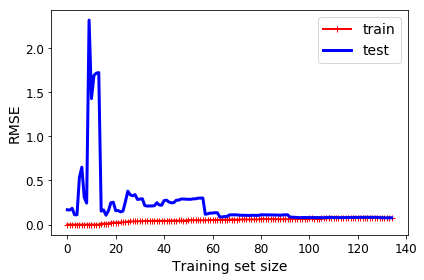

In [221]:
plot_learning_curves(lin_reg, major_el, major_el_labels, major_el_test, major_el_test_labels)
save_fig("linear_learning_curves")

Saving figure polynomial_learning_curves


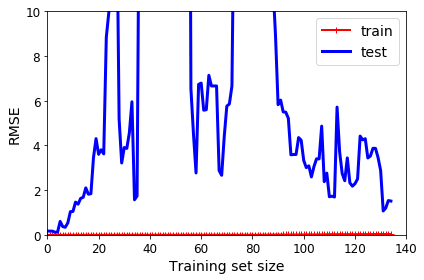

In [235]:
plot_learning_curves(poly_lin_reg, major_el_poly, major_el_labels, major_el_test_poly, major_el_test_labels)
plt.axis([0, 140, 0, 10])
save_fig("polynomial_learning_curves")

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


Saving figure regularized_polynomial_learning_curves


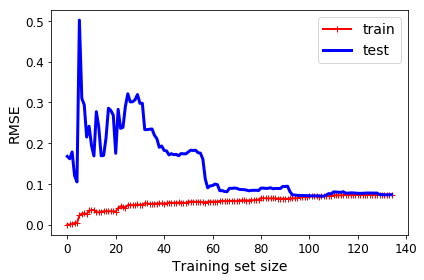

In [265]:
plot_learning_curves(elastic_net, major_el_poly, major_el_labels, major_el_test_poly, major_el_test_labels)
save_fig("regularized_polynomial_learning_curves")